In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Operations:
    def __init__(self, input_nodes=[]):
        self.input_nodes=input_nodes
        #self.consumers=[]
        #for input_node in input_nodes:
            #input_node.consumers.append(self)
            
        _default_graph.operations.append(self)
        
    def compute(self):
        pass

In [3]:
class add(Operations):
    def __init__(self,x,y):
        super().__init__([x,y])
    def compute(self,x_value,y_value):
        return x_value+y_value

In [4]:
class subtract(Operations):
    def __init__(self,x,y):
        super().__init__([x,y])
    def compute(self,x_value,y_value):
        return x_value-y_value

In [5]:
class matmul(Operations):
    def __init__(self,x,y):
        super().__init__([x,y])
    def compute(self,x_value,y_value):
        return x_value.dot(y_value)

In [6]:
class Placeholders:
    def __init__(self):
        self.consumers=[]
        _default_graph.placeholders.append(self)

In [7]:
class Variables:
    def __init__(self,initial_value=None):
        self.value = initial_value
        self.consumers = []
        _default_graph.variables.append(self)

In [8]:
class Graph:
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []

    def as_default(self):
        global _default_graph
        _default_graph = self

In [9]:
Graph().as_default()

A = Variables([[1, 0], [0, -1]])
b = Variables([1, 1])


x = Placeholders()

y = matmul(A, x)
z = add(y, b)

In [10]:
class Session:
    def run(self, operation, feed_dict={}):
        nodes_postorder = traverse_postorder(operation)
        for node in nodes_postorder:
            if type(node) == Placeholders:
                node.output = feed_dict[node]
            elif type(node) == Variables:
                node.output = node.value
            else:  
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
            if type(node.output) == list:
                node.output = np.array(node.output)
        return operation.output
def traverse_postorder(operation):
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operations):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
    recurse(operation)
    return nodes_postorder

In [11]:
session = Session()
output = session.run(z, {
    x: [1, 2]
})
print(output)

[ 2 -1]


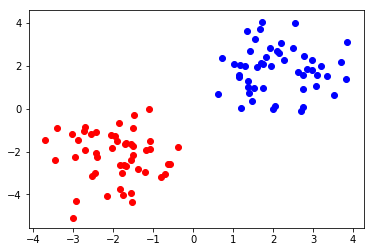

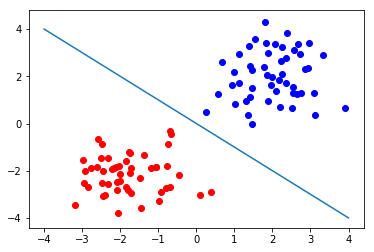

In [12]:
red_points=np.random.randn(50,2)-2*np.ones((50,2))
blue_points=np.random.randn(50,2)+2*np.ones((50,2))
plt.scatter(red_points[:,0],red_points[:,1],color='red')
plt.scatter(blue_points[:,0],blue_points[:,1],color='blue')
x_axis = np.linspace(-4, 4, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)
plt.show()

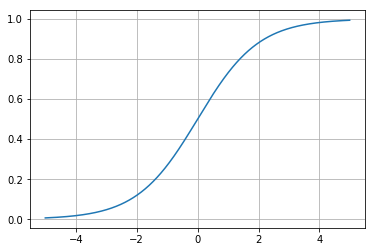

In [13]:
a=np.arange(-5,5,0.01)
s=1/(1+np.exp(-a))
plt.plot(a, s)
plt.grid(True)
plt.show()

In [14]:
class Sigmoid(Operations):
    def __init__(self,a):
        super().__init__([a])
    def compute(self,a_value):
        return 1/(1+np.exp(-a_value))
        

In [15]:
Graph().as_default()

x = Placeholders()
w = Variables([1, 1])
b = Variables(0)
p = Sigmoid( add(matmul(w, x), b) )

In [16]:
session = Session()
print(session.run(p, {
    x: [3, 2]
}))

0.993307149076


In [17]:
class softmax(Operations):
    def __init__(self, a):
        super().__init__([a])
    def compute(self, a_value):
        return np.exp(a_value) / np.sum(np.exp(a_value), axis=1)[:, None]

In [18]:
Graph().as_default()

X = Placeholders()
W = Variables([
    [1, -1],
    [1, -1]
])
b = Variables([0, 0])
p = softmax( add(matmul(X, W), b) )
session = Session()
output_probabilities = session.run(p, {
    X: np.concatenate((blue_points, red_points))
})
print(output_probabilities[:10])

[[  8.13403143e-01   1.86596857e-01]
 [  9.75148198e-01   2.48518018e-02]
 [  9.96629762e-01   3.37023810e-03]
 [  9.99982394e-01   1.76057369e-05]
 [  9.99996034e-01   3.96629003e-06]
 [  9.98151802e-01   1.84819757e-03]
 [  9.98991680e-01   1.00832041e-03]
 [  9.99995297e-01   4.70293854e-06]
 [  9.99964094e-01   3.59059265e-05]
 [  9.46677247e-01   5.33227534e-02]]


array([3, 6])